In [ ]:
from eden_scripts.download_datasets import download, extract
import fsspec
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

## Download final queries

In [ ]:
fs = fsspec.filesystem("local")
download(
    fs=fs,
    url="https://dl.fbaipublicfiles.com/image_similarity_challenge/public/final_queries.zip",
    destination_path="final_queries.zip",
    chunk_size=10485760,
)

100%|██████████| 8.73G/8.73G [02:22<00:00, 65.9MB/s]


In [ ]:
extract(fs, "final_queries", "final_queries.zip")

Removing zip file...


## Download references 6

In [ ]:
download(
    fs=fs,
    url="https://dl.fbaipublicfiles.com/image_similarity_challenge/public/references_6.zip",
    destination_path="references6.zip",
    chunk_size=10485760,
)

100%|██████████| 8.16G/8.16G [02:29<00:00, 58.5MB/s]


In [ ]:
extract(fs, "references6", "references6.zip")

Removing zip file...


## Download references 7

In [ ]:
download(
    fs=fs,
    url="https://dl.fbaipublicfiles.com/image_similarity_challenge/public/references_7.zip",
    destination_path="references7.zip",
    chunk_size=10485760,
)

100%|██████████| 8.18G/8.18G [02:24<00:00, 60.7MB/s]


In [ ]:
extract(fs, "references7", "references7.zip")

Removing zip file...


## Download references 8

In [25]:
download(
    fs=fs,
    url="https://dl.fbaipublicfiles.com/image_similarity_challenge/public/references_8.zip",
    destination_path="references8.zip",
    chunk_size=10485760,
)

100%|██████████| 8.16G/8.16G [02:21<00:00, 61.7MB/s]


In [26]:
extract(fs, "references8", "references8.zip")

Removing zip file...


## Download references 9

In [27]:
download(
    fs=fs,
    url="https://dl.fbaipublicfiles.com/image_similarity_challenge/public/references_9.zip",
    destination_path="references9.zip",
    chunk_size=10485760,
)

100%|██████████| 8.20G/8.20G [02:08<00:00, 68.6MB/s]


In [28]:
extract(fs, "references9", "references9.zip")

Removing zip file...


## Download references 10

In [49]:
download(
    fs=fs,
    url="https://dl.fbaipublicfiles.com/image_similarity_challenge/public/references_10.zip",
    destination_path="references10.zip",
    chunk_size=10485760,
)

100%|██████████| 8.17G/8.17G [02:08<00:00, 68.1MB/s]


In [50]:
extract(fs, "references10", "references10.zip")

Removing zip file...


## Show nearest neighbors

In [ ]:
nearest_neighbors = pd.read_pickle("results/nearest_neighbors.pkl")

In [ ]:
def show_nearest_neighbors(
    nearest_neighbors, query_folder, ref_folders, k=1, show_correct=True, num_examples=5
):
    if isinstance(ref_folders, str) or isinstance(ref_folders, Path):
        ref_folders = [ref_folders]

    shown = 0

    for query_id, neighbors in nearest_neighbors.items():
        topk = neighbors[:k]
        for sim, neighbor_id, is_correct in topk:
            if is_correct == show_correct:
                if not str(query_id).startswith("5"):
                    continue

                query_img_path = Path(query_folder) / f"Q{str(query_id)}.jpg"

                ref_img_path = None
                for folder in ref_folders:
                    candidate = Path(folder) / f"R{neighbor_id}.jpg"
                    if candidate.exists():
                        ref_img_path = candidate
                        break

                if not query_img_path.exists():
                    continue
                if ref_img_path is None:
                    continue

                query_img = Image.open(query_img_path)
                ref_img = Image.open(ref_img_path)

                fig, axs = plt.subplots(1, 2, figsize=(8, 4))
                axs[0].imshow(query_img)
                axs[0].axis("off")
                axs[0].set_title(f"Query: {query_id}", fontsize=10)

                axs[1].imshow(ref_img)
                axs[1].axis("off")
                axs[1].set_title(f"Match: {neighbor_id}", fontsize=10)

                fig.suptitle(
                    f"Similarity: {sim:.3f} | {'Correct' if is_correct else 'Incorrect'}",
                    fontsize=12,
                )
                plt.tight_layout()
                plt.show()

                shown += 1
                if shown >= num_examples:
                    return

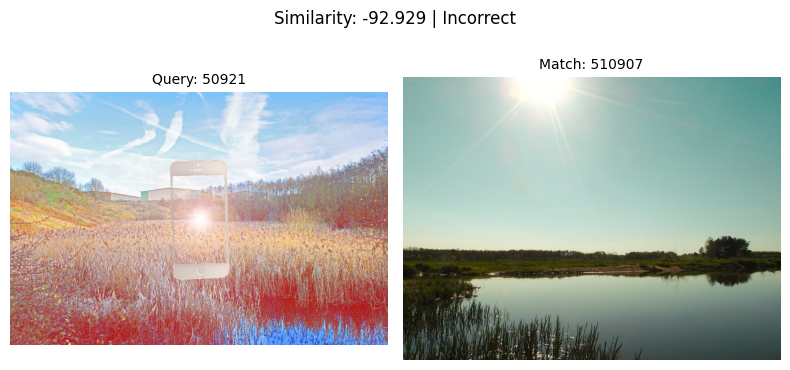

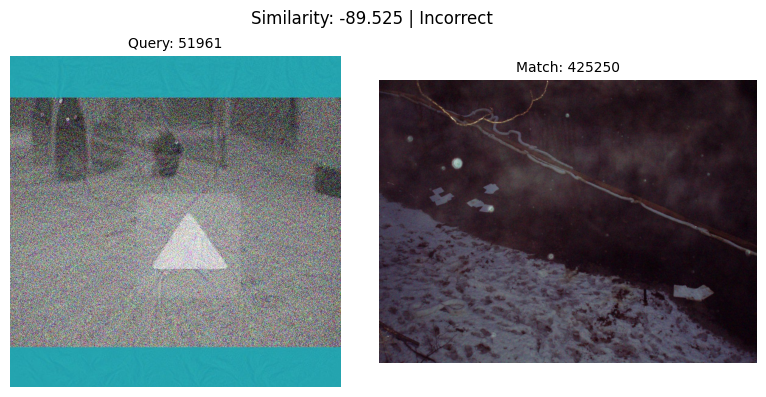

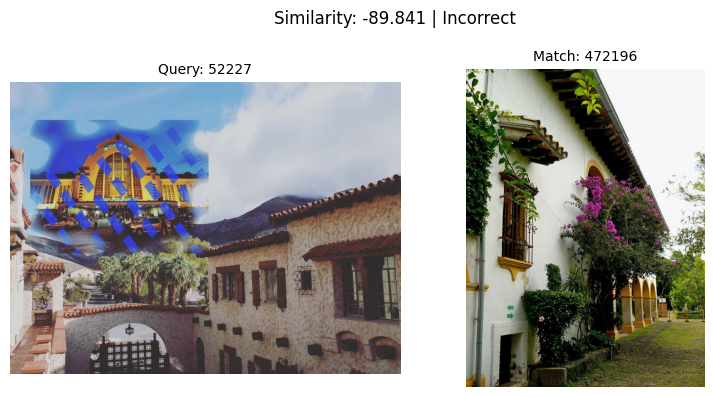

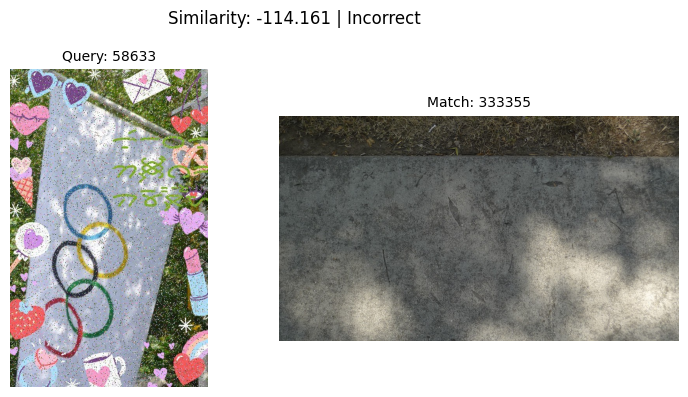

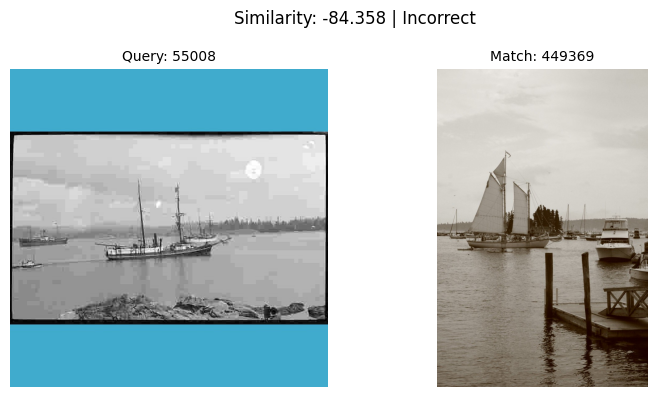

In [55]:
show_nearest_neighbors(
    nearest_neighbors=nearest_neighbors,
    query_folder="final_queries/images/final_queries",
    ref_folders=[
        "references6/images/references",
        "references7/images/references",
        "references8/images/references",
        "references9/images/references",
        "references10/images/references",
    ],
    k=1,
    show_correct=False,
    num_examples=5,
)

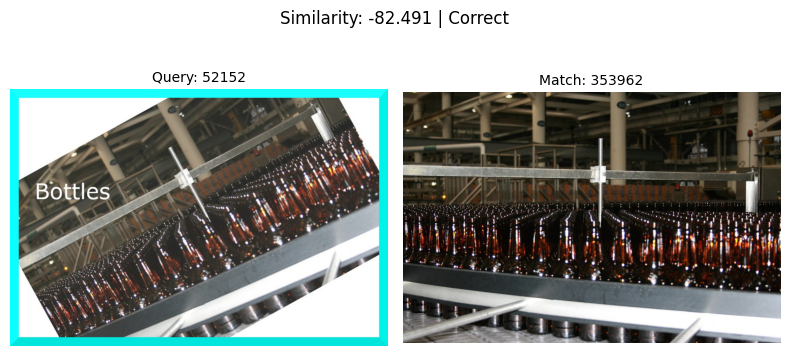

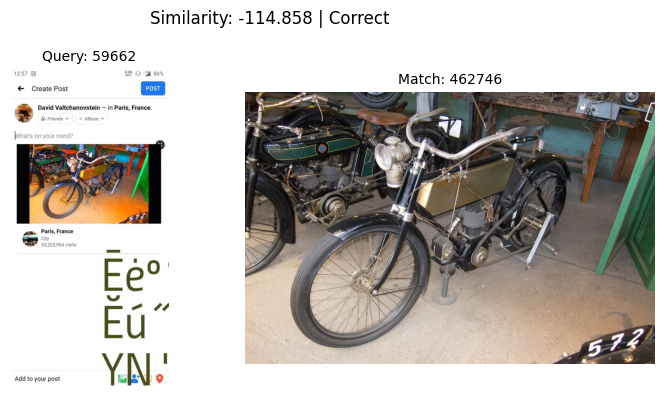

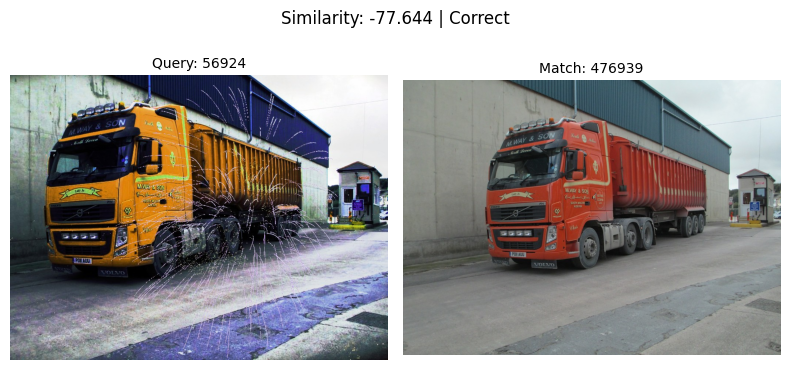

In [56]:
show_nearest_neighbors(
    nearest_neighbors=nearest_neighbors,
    query_folder="final_queries/images/final_queries",
    ref_folders=[
        "references6/images/references",
        "references7/images/references",
        "references8/images/references",
        "references9/images/references",
        "references10/images/references",
    ],
    k=1,
    show_correct=True,
    num_examples=5,
)